In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- CONFIGURAÇÃO VISUAL ---
PALETA = {
    'arabica': '#02A556',
    'robusta': '#CC2229',
    'texto':   '#022B49',
    'grid':    '#0393BD'
}

In [2]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

# --- CARGA DE DADOS ---
df = pd.read_parquet('../data/processed/dados_completos_commodities.parquet')

# --- ENGENHARIA DE FEATURES (SAZONALIDADE) ---
# Extraindo o número do mês (1 = Janeiro, 12 = Dezembro)
df['Mes'] = df['Date'].dt.month

# Extraindo o nome do mês para melhor identificação no gráfico (Jan, Fev, Mar...)
# O Python geralmente traz em inglês (Jan, Feb), mas serve perfeitamente
df['Nome_Mes'] = df['Date'].dt.strftime('%b')

print("--- Dados Prontos para Análise de Safra ---")
display(df[['Date', 'Arabica_BRL', 'Mes', 'Nome_Mes']].head())
display(df[['Date', 'Arabica_BRL', 'Mes', 'Nome_Mes']].tail())

--- Dados Prontos para Análise de Safra ---


,Date,Arabica_BRL,Mes,Nome_Mes
0,2021-01-19,890.53,1,Jan
1,2021-01-20,887.12,1,Jan
2,2021-01-21,884.90,1,Jan
3,2021-01-22,877.79,1,Jan
4,2021-01-25,891.04,1,Jan


,Date,Arabica_BRL,Mes,Nome_Mes
1295,2026-01-12,2529.24,1,Jan
1296,2026-01-13,2560.70,1,Jan
1297,2026-01-14,2529.36,1,Jan
1298,2026-01-15,2556.03,1,Jan
1299,2026-01-16,2522.07,1,Jan


Gráfico salvo em '../img/fig05_sazonalidade.png'


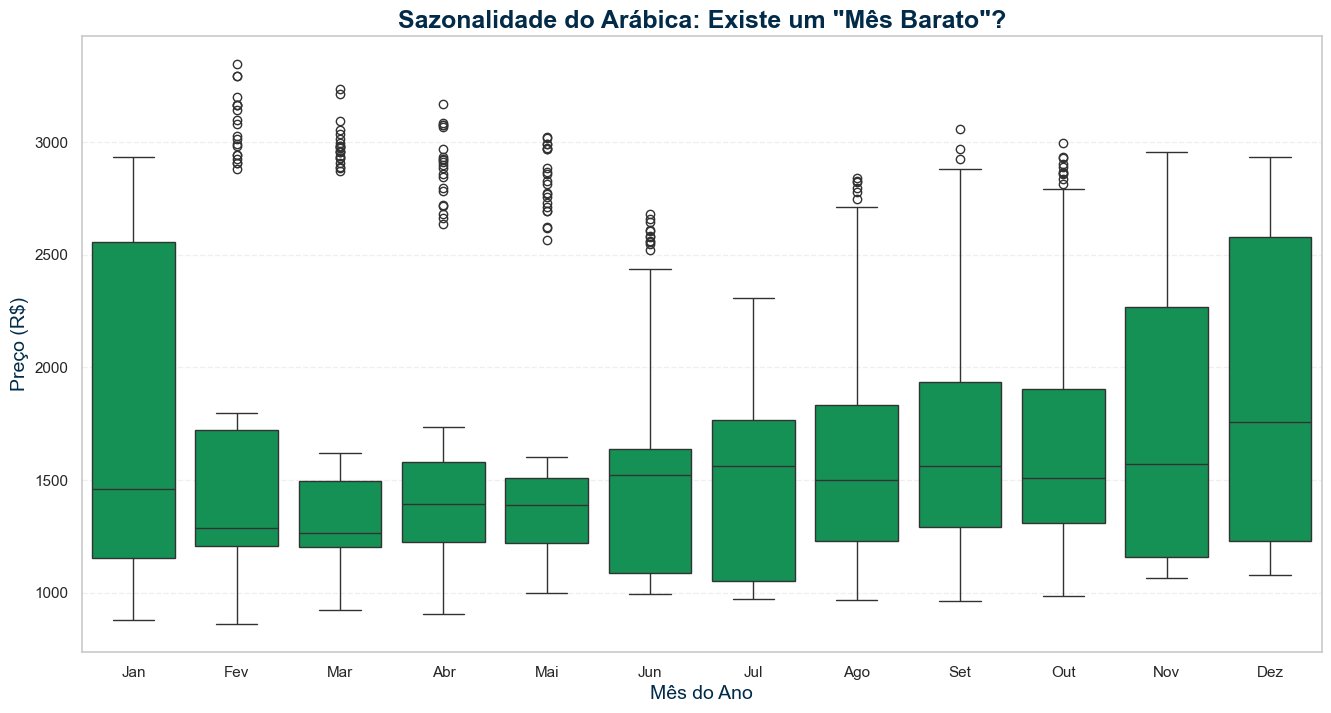

--- Média de Preço por Mês (Histórico) ---


,Mes,Arabica_BRL,Diferenca_Media
6,7,1535.533455,-121.872477
5,6,1552.457103,-104.948829
2,3,1563.772162,-93.633770
7,8,1594.659369,-62.746562
4,5,1596.414324,-60.991607
3,4,1605.294717,-52.111215
1,2,1633.394356,-24.011575
0,1,1700.189259,42.783328
8,9,1706.801389,49.395457
9,10,1732.156636,74.750705


In [3]:
# --- ANÁLISE VISUAL DE SAZONALIDADE ---
plt.figure(figsize=(16, 8))

# Criando o Boxplot
# x = Mês (1 a 12)
# y = Preço em Reais
sns.boxplot(x='Mes', 
            y='Arabica_BRL', 
            data=df, 
            color=PALETA['arabica']) 

# Decoração
plt.title('Sazonalidade do Arábica: Existe um "Mês Barato"?', fontsize=18, fontweight='bold', color=PALETA['texto'])
plt.xlabel('Mês do Ano', fontsize=14, color=PALETA['texto'])
plt.ylabel('Preço (R$)', fontsize=14, color=PALETA['texto'])
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Substituir 1, 2, 3... pelos nomes Jan, Fev, Mar...
meses_labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
plt.xticks(ticks=range(0, 12), labels=meses_labels)

# Salvar na pasta img com a numeração correta
plt.savefig('../img/fig05_sazonalidade.png', dpi=300, bbox_inches='tight')
print("Gráfico salvo em '../img/fig05_sazonalidade.png'")

plt.show()

# --- TABELA RESUMO (A PROVA DOS NOVE) ---
# Vamos calcular o preço médio histórico de cada mês para confirmar o gráfico
sazonalidade = df.groupby('Mes')['Arabica_BRL'].mean().reset_index()
sazonalidade['Diferenca_Media'] = sazonalidade['Arabica_BRL'] - sazonalidade['Arabica_BRL'].mean()

print("--- Média de Preço por Mês (Histórico) ---")
display(sazonalidade.sort_values('Arabica_BRL'))